In [1]:
!pip install fidap

     |████████████████████████████████| 122kB 6.5MB/s 
     |████████████████████████████████| 1.3MB 23.0MB/s 
     |████████████████████████████████| 296kB 37.7MB/s 
     |████████████████████████████████| 143kB 36.1MB/s 


In [2]:
!pip install config

In [41]:
import pandas as pd
from fidap import fidap_client
import config
import matplotlib.pyplot as plt
import datetime
import plotly.express as px

In [19]:
import seaborn as sns

In [4]:
fidap = fidap_client(api_key='bba847abed854ef38e6256823ea2d96c' )

In [58]:
df1 = fidap.sql("""select * from bigquery-public-data.covid19_weathersource_com.county_day_history limit 100000 """)

**1. Maximun temperature across each distinct date in teh dataset**

In [29]:
tem = fidap.sql("""SELECT  date , max(max_temperature_air_2m_f) as max_tem 
                  FROM bigquery-public-data.covid19_weathersource_com.county_day_history 
                 GROUP BY(date) 
                 LIMIT 50 """)

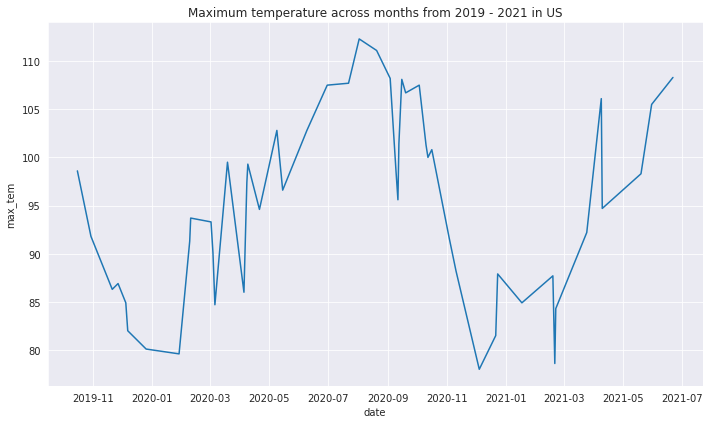

In [30]:

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.lineplot(data=tem,x='date',y='max_tem')
_=plt.title('Maximum temperature across months from 2019 - 2021 in US')
plt.tight_layout()

In [64]:
# df1['year'] = pd.DatetimeIndex(df1['date']).year
# df1['month']= pd.DatetimeIndex(df1['date']).month

2.

In [37]:
df2 = fidap.sql(""" 
    select * from bigquery-public-data.covid19_weathersource_com.postal_code_day_history limit 300
""")


In [ ]:
df2.nunique()

***2.Highest and Lowest recorded temperature in this dataset***

In [47]:
data1=df2.sort_values(by=['avg_temperature_air_2m_f'],ascending=False).head(1)
data2=df2.sort_values(by=['avg_temperature_air_2m_f'],ascending=True).head(1)
data = pd.concat([data1,data2],)
data.index = ['Highest','Lowest']
data[['postal_code','country','date','avg_temperature_air_2m_f']]

,postal_code,country,date,avg_temperature_air_2m_f
Highest,12130,US,2019-10-17,47.7
Lowest,091-0162,JP,2019-10-17,34.1


In [46]:
px.scatter_geo(lat=[36.2048,37.0902],lon=[138.2529,265.7129],text=['JP','US'],size=[0.5,0.5],color=[110,-50],color_continuous_scale='bluered')

**3. 10 hottest countries in the dataset**

In [122]:
hot_country =  fidap.sql(""" 
    select country, avg (max_temperature_air_2m_f) as max_tem 
    from bigquery-public-data.covid19_weathersource_com.postal_code_day_history
    group by country
    order by  max_tem desc
    limit 10
""")


In [129]:
df2.columns

Index(['postal_code', 'country', 'date', 'min_temperature_air_2m_f',
       'avg_temperature_air_2m_f', 'max_temperature_air_2m_f',
       'min_humidity_relative_2m_pct', 'avg_humidity_relative_2m_pct',
       'max_humidity_relative_2m_pct', 'min_humidity_specific_2m_gpkg',
       'avg_humidity_specific_2m_gpkg', 'max_humidity_specific_2m_gpkg'],
      dtype='object')

**4. 10 Coldest countries in the dataset**

In [130]:
cold_country =  fidap.sql(""" 
    select country, avg (max_humidity_relative_2m_pct) as max_hum 
    from bigquery-public-data.covid19_weathersource_com.postal_code_day_history
    group by country
    order by  max_hum desc
    limit 10
""")


In [123]:
hot_country

,country,max_tem
0,NE,102.033623
1,SN,99.240783
2,SD,95.986230
3,NG,94.319267
4,GW,94.182755
5,MM,92.728494
6,GN,92.592697
7,KH,91.368277
8,SS,91.319750
9,OM,89.280125


In [131]:
cold_country

,country,max_hum
0,GS,98.422777
1,AD,96.467796
2,LI,96.385575
3,EC,95.747059
4,GT,95.488181
5,AT,95.443583
6,MY,95.388198
7,SI,95.362815
8,BN,95.359431
9,CH,95.346014


In [127]:
data = hot_country[['country','max_tem']].groupby(['country']).mean().reset_index()
px.choropleth(data_frame=data,locations="country",
              color="max_tem",color_continuous_scale = "bugn",title=" Top 10 Hottest place by country ")

**5. Maximum temperature across each country, month in the year 2020**

In [ ]:
t3 =  fidap.sql(""" 
    select  country, EXTRACT(MONTH from date) as month, max(max_temperature_air_2m_f) as max_tem 
    from bigquery-public-data.covid19_weathersource_com.postal_code_day_history
    where (SELECT EXTRACT(YEAR from date)) = 2020
    group by country, month

""")

In [105]:
data = t3[['country','month','max_tem']].groupby(['country','month']).mean().reset_index()
px.choropleth(data_frame=data,locations="country",locationmode='country names',animation_frame="month",
              color="max_tem",color_continuous_scale = "peach",title=" countrywise average temperature over the months")